# 1.数据爬取

In [1]:
import requests   # 导入所需要的模块
import json
import urllib.request
import pandas as pd

#设置请求头，伪装为浏览器
headers = {'referer':'https://www.kaggle.com/loveall/human-happiness-indicators',
           'accept':'application/json',
           'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36'}
##      爬取数据集属性特征

url = 'https://www.kaggle.com/requests/GetDatabundleExternalColumnsRequest'  #数据存储的网站
r = requests.post(url,headers = headers)    #发起请求，将找到的第一个数据源作为请求目标

data_json = json.loads(r.text)#将发现的数据转化为类似字典的json格式
data_col = data_json['result']['columns']#取出json中的数据，columns为列表，存储着数据

columns = [0]*len(data_col)# 定义一个存放数据的列表

for i in range(len(data_col)):
    columns[i] = data_col[i]['name']#将对应的属性赋值给columns

##      爬取具体数据

url = 'https://www.kaggle.com/requests/GetDataViewExternalRequest'   #数据存储的url
req = urllib.request.Request(url = url,headers = headers,method='POST')   #发起请求，将找到的第一个数据源作为请求目标
response = urllib.request.urlopen(req)   # 将爬取内容封装为response对象

data_json1 = json.loads(response.read().decode('utf-8'))   #将发现的数据转化为类似字典的json格式
data_in = data_json1['result']['dataView']['dataTable']['rows']    # 数据存储在列表中

##      组合成表格
data = pd.DataFrame(inf['text'] for inf in data_in)     #将爬取的数据放入到表格中
data.columns = columns     #表格对应的列属性

data.to_csv('happiness.csv')    #保存为表格

data.head()   #显示数据的前五行

,id,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0


# 2.读取数据

In [1]:
import pandas as pd  #导入pandas模块

data = pd.read_csv('happiness.csv')   #利用read_csv()函数读取文件

In [2]:
data.info()#查询样本数据相关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
id             17137 non-null int64
year           17137 non-null int64
workstat       17134 non-null object
prestige       16283 non-null float64
divorce        9754 non-null object
widowed        11096 non-null object
educ           17093 non-null float64
reg16          17137 non-null object
babies         17036 non-null float64
preteen        17036 non-null float64
teens          17049 non-null float64
income         15045 non-null object
region         17137 non-null object
attend         16864 non-null object
happy          17137 non-null object
owngun         11297 non-null object
tvhours        11794 non-null float64
vhappy         17137 non-null int64
mothfath16     17132 non-null float64
black          17137 non-null int64
gwbush04       1930 non-null float64
female         17137 non-null int64
blackfemale    17137 non-null int64
gwbush00       3436 non-null float64
occ

+ 观察到数据中有缺失值，且属性列中有字符串类型

# 数据预处理
1. 删除缺失值过多的特征

In [3]:
data_nan = data.isnull().sum()/len(data)#计算缺失值比例

data_nan.apply(lambda x:format(x,'.1%'))#转化为百分数
print('数据的缺失值比例为：\n{}'.format(data_nan))

#删除缺失值大于50%的数据
columns = data.columns[~(data_nan>=0.5)]
data_1 = pd.DataFrame(data)[columns]

数据的缺失值比例为：
id             0.000000
year           0.000000
workstat       0.000175
prestige       0.049834
divorce        0.430822
widowed        0.352512
educ           0.002568
reg16          0.000000
babies         0.005894
preteen        0.005894
teens          0.005135
income         0.122075
region         0.000000
attend         0.015930
happy          0.000000
owngun         0.340783
tvhours        0.311782
vhappy         0.000000
mothfath16     0.000292
black          0.000000
gwbush04       0.887378
female         0.000000
blackfemale    0.000000
gwbush00       0.799498
occattend      0.015930
regattend      0.015930
y94            0.000000
y96            0.000000
y98            0.000000
y00            0.000000
y02            0.000000
y04            0.000000
y06            0.000000
unem10         0.338216
dtype: float64


2. 去掉无影响的特征

In [4]:
#去掉和year相同意义的特征以及对目标值无影响的特征
columns_1 = ['id','y94','y96','y98','y00','y02','y04','y06','vhappy']
data_2 = data_1.drop(columns_1,axis=1)
data_2.head()

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,happy,owngun,tvhours,mothfath16,black,female,blackfemale,occattend,regattend,unem10
0,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,0.0,...,pretty happy,NaN,2.0,1.0,1,1,1,1.0,0.0,1.0
1,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,very happy,NaN,3.0,0.0,1,0,0,0.0,0.0,0.0
2,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,pretty happy,iap,1.0,0.0,1,1,1,0.0,1.0,NaN
3,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,0.0,...,not too happy,NaN,3.0,0.0,0,0,0,0.0,0.0,1.0
4,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,1.0,...,not too happy,iap,NaN,0.0,1,1,1,0.0,0.0,0.0


3. 将字符串格式转化为整数编码

In [5]:
##  将字符串格式转化为整数编码

obj=['workstat','divorce','widowed','reg16','income','region','attend','happy','owngun']#将数值为字符串格式的列放入列表中
print('字符串类型列的取值及对应数目')
for j in obj:#循环遍历字符串格式的列
    print(data[j].value_counts())#查看每列中取值类型及其对应的数目
    print('-----------------------')#分隔线

字符串类型列的取值及对应数目
working fulltime    9214
retired             2459
keeping house       1912
working parttime    1812
school               521
unempl, laid off     485
other                396
temp not working     335
Name: workstat, dtype: int64
-----------------------
no     7421
yes    2333
Name: divorce, dtype: int64
-----------------------
iap    10718
yes      378
Name: widowed, dtype: int64
-----------------------
e. nor. central    3148
south atlantic     2643
middle atlantic    2620
pacific            1738
w. sou. central    1635
w. nor. central    1294
foreign            1201
e. sou. central    1169
mountain            881
new england         808
Name: reg16, dtype: int64
-----------------------
$25000 or more    9725
$20000 - 24999    1278
$10000 - 14999    1251
$15000 - 19999    1099
$8000 to 9999      399
$7000 to 7999      218
$5000 to 5999      209
$6000 to 6999      202
$1000 to 2999      182
lt $1000           176
$4000 to 4999      156
$3000 to 3999      150
Name: income

In [6]:
list_1 = [[4,3,5,7,6,0,2,1],[0,1],[0,1],range(10,0,-1),[12,11,9,10,8,7,5,6,2,1,4,3],range(9,0,-1),[0,7,2,3,5,1,8,4,6],[3,5,1],[0,1]]#按照取值将字符串等级制
for i in range(len(obj)):#循环更改
    dict_1 = data_2[obj[i]].value_counts()#将列取值和对应数目转化为字典
    df = pd.Series(list_1[i],index=list(dict_1.index))#创建Series格式
    da = df.to_dict()#将Series转化为字典
    data_2[obj[i]] = data_2[obj[i]].map(da)#利用map函数将字符串格式转化为整数编码

data_2.head()

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,happy,owngun,tvhours,mothfath16,black,female,blackfemale,occattend,regattend,unem10
0,1994,5.0,46.0,NaN,0.0,12.0,8,2.0,3.0,0.0,...,3,NaN,2.0,1.0,1,1,1,1.0,0.0,1.0
1,1994,4.0,22.0,0.0,0.0,12.0,4,0.0,0.0,0.0,...,5,NaN,3.0,0.0,1,0,0,0.0,0.0,0.0
2,1994,4.0,29.0,0.0,0.0,12.0,4,0.0,0.0,0.0,...,3,0.0,1.0,0.0,1,1,1,0.0,1.0,NaN
3,1994,4.0,42.0,1.0,0.0,8.0,4,0.0,0.0,0.0,...,1,NaN,3.0,0.0,0,0,0,0.0,0.0,1.0
4,1994,7.0,36.0,NaN,NaN,13.0,8,0.0,1.0,1.0,...,1,0.0,NaN,0.0,1,1,1,0.0,0.0,0.0


4. 缺失值填补

In [7]:
## 缺失值填补
data_3 = data_2.fillna(-1)#-1表示未知

data_3_nan = data_3.isnull().sum()/len(data_3)#计算缺失值比例

data_3_nan.apply(lambda x:format(x,'.1%'))#转化为百分数

year           0.0%
workstat       0.0%
prestige       0.0%
divorce        0.0%
widowed        0.0%
educ           0.0%
reg16          0.0%
babies         0.0%
preteen        0.0%
teens          0.0%
income         0.0%
region         0.0%
attend         0.0%
happy          0.0%
owngun         0.0%
tvhours        0.0%
mothfath16     0.0%
black          0.0%
female         0.0%
blackfemale    0.0%
occattend      0.0%
regattend      0.0%
unem10         0.0%
dtype: object

# 可视化操作

1. 数据直观分布

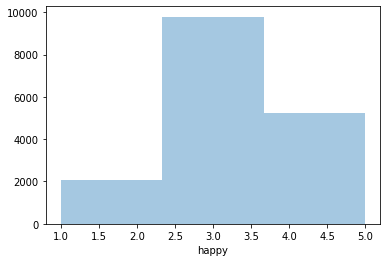

In [11]:
import seaborn as sns
sns.distplot(data_3['happy'],bins=3,kde=False)#绘制幸福指数分布直方图

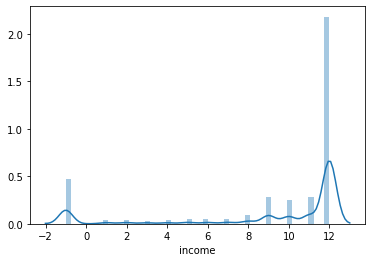

In [12]:
sns.distplot(data_3['income'],bins=50)#绘制收入分布的直方图

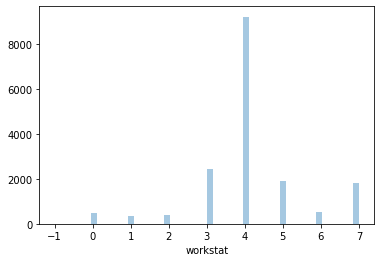

In [14]:
sns.distplot(data_3['workstat'],bins=50,kde=False)#绘制工作状态的直方图

2. 不同因素影响下的幸福感分布

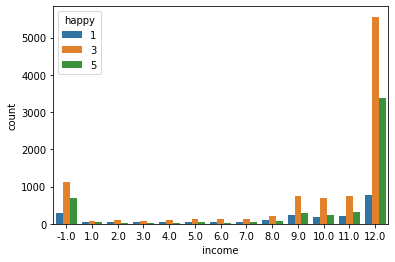

In [15]:
sns.countplot(x='income',hue='happy',data = data_3)#观察不同收入的人群的幸福指数

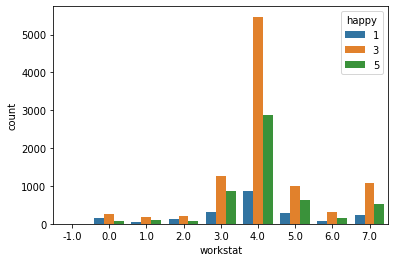

In [16]:
sns.countplot(x='workstat',hue='happy',data = data_3)#观察不同工作地点的人的幸福指数分布

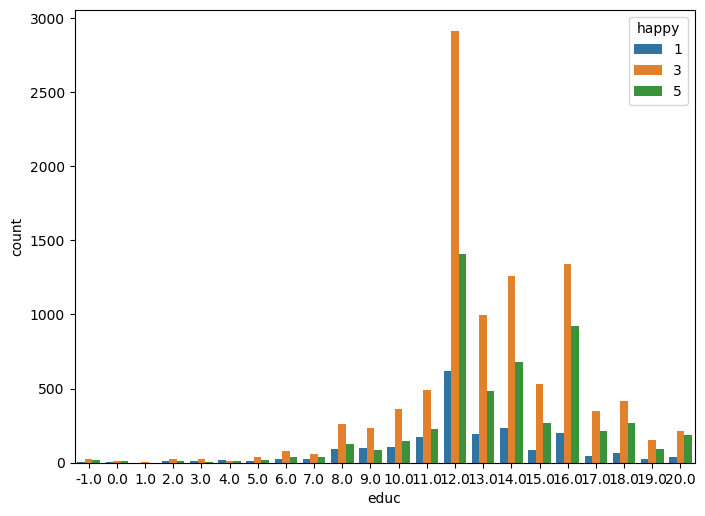

In [18]:
import matplotlib.pyplot as plt#导入matplotlib.pyplot包
#%matplotlib inline#图形显示

plt.figure(figsize=(8,6),dpi=100)#画布大小设置
sns.countplot(x='educ',hue='happy',data = data_3)#观察不同受教育程度的人幸福指数分布

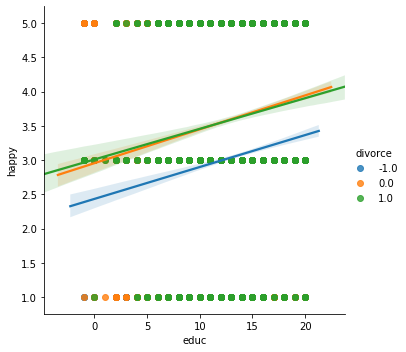

In [19]:
sns.lmplot(x='educ',y='happy',hue='divorce',data= data_3)#观察受教育程度，以及是否离婚对幸福指数的影响

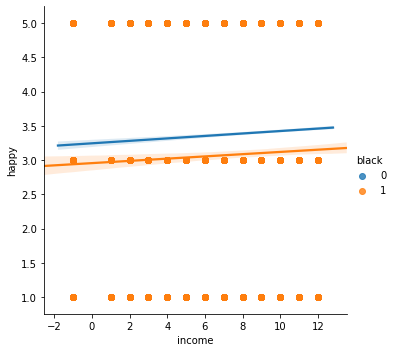

In [20]:
sns.lmplot(x='income',y='happy',hue='black',data= data_3)#观察收入和种族对幸福指数的影响

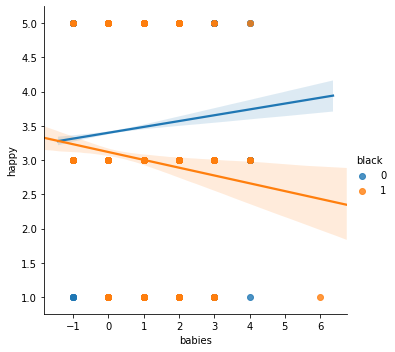

In [21]:
sns.lmplot(x='babies',y='happy',hue='black',data= data_3)#观察小孩子数目以及种族对幸福指数分布的影响

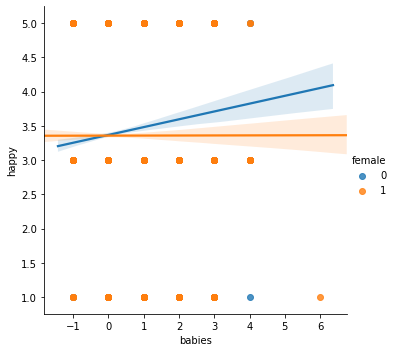

In [22]:
sns.lmplot(x='babies',y='happy',hue='female',data= data_3)#观察小孩子数目以及性别对幸福指数分布的影响

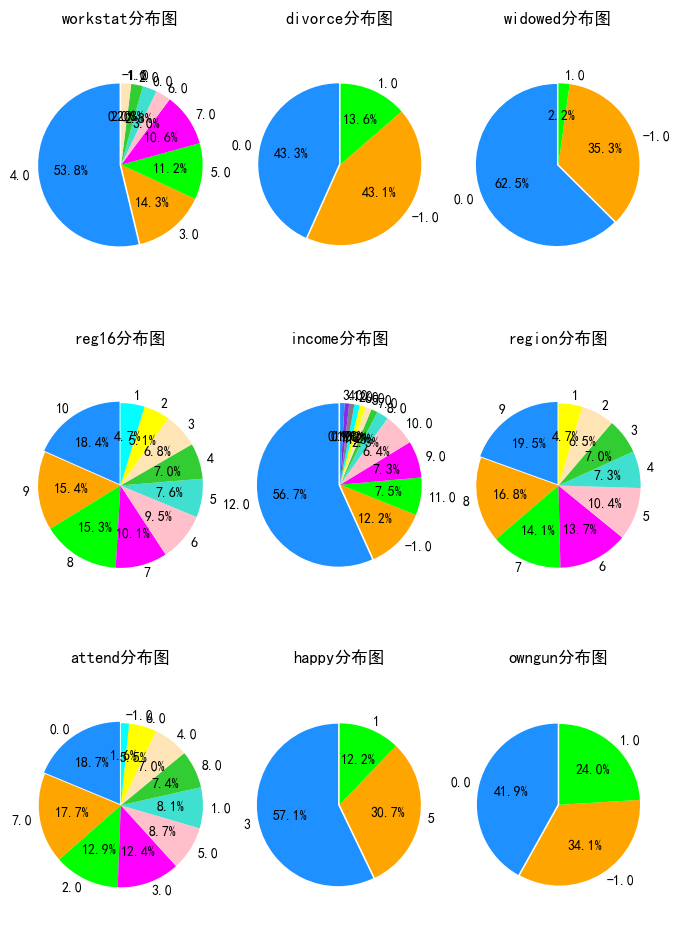

In [23]:
## 可视化操作
import matplotlib.pyplot as plt#导入matplotlib包用于图形显示
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(8,12),dpi=100)#设置画布大小

font = {'family':'SimHei'}#中文字体
mpl.rc('font',**font)

colors_1=['dodgerblue','orange','lime','fuchsia','pink','turquoise','limegreen','moccasin','yellow','cyan','grey','blueviolet']#颜色设置
for i in range(len(obj)):
    plt.subplot(3,3,i+1)#多个图形显示，画布分块
    dict1 = data_3[obj[i]].value_counts()#将列取值和对应数目转化为字典
    colors = colors_1[:len(dict1)]
    explode=tuple([0.02]+[0]*(len(dict1)-1))#设置每部分的偏移量，第一部分突出0.02
    labels=list(dict1.index)#设置列中的取值为标签
    plt.pie(list(dict1.values),explode = explode,colors = colors,labels=labels,startangle=90,autopct='%3.1f%%')#绘制饼状图
    plt.axis('equal')
    plt.title(obj[i]+'分布图')

# 观察特征相关性

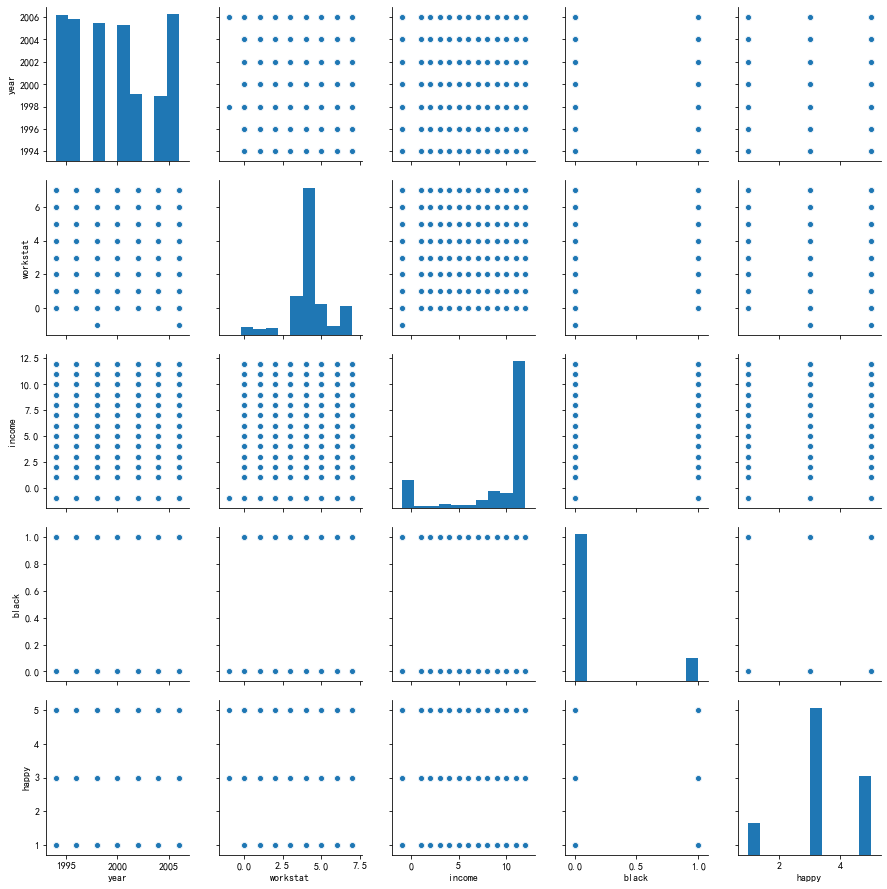

In [25]:
#点对图
sns.pairplot(data_3[['year','workstat','income','black','happy']])#绘制多个特征两两之间的散点图

D:\Users\xyf\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\xyf\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


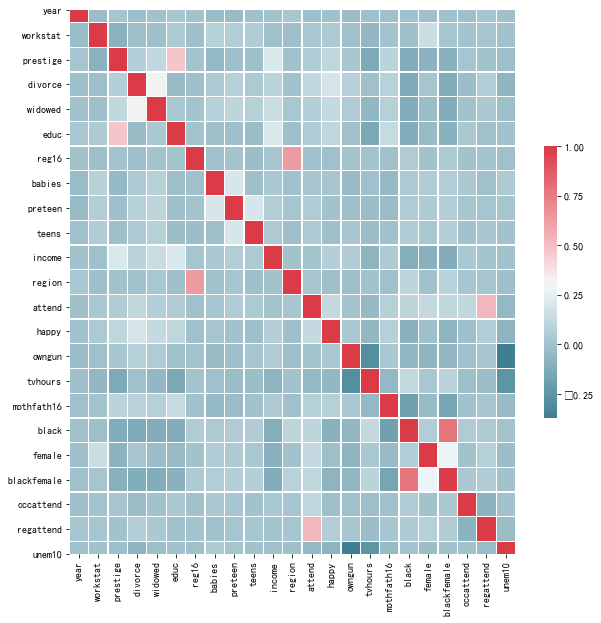

In [26]:
#  热力图
corr = data_3.corr()#特征的相关系数矩阵

f,ax = plt.subplots(figsize=(10,10))#画布和坐标轴设置
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1.0, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)#绘制热气图
plt.show()#显示图形

# 因变量和自变量划分

In [9]:
Y = data_3['happy']#以幸福指数为因变量

X = data_3.drop(['happy'],axis=1)#去除掉因变量happy的属性

# 特征选择

1. 递归特征消除

In [10]:
#导入所需要的包
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier#随机森林
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=50,random_state=10)#以随机森林为基模型
#执行RFE
rfe = RFE(forest,n_features_to_select=15)#选择15个特征
rfe.fit_transform(X,Y)#利用模型进行转换

y_pred = rfe.predict(X)#调用predict()进行预测

print('预测准确度为：')
print(accuracy_score(Y,y_pred))#观察模型预测准确度

print(rfe.ranking_)#特征排名

print('RFE选择出的特征有:')
print(X.columns[rfe.support_])#递归特征消除选择出的特征

预测准确度为：
0.9999416467292992
[1 1 1 1 4 1 1 1 1 3 1 1 1 1 1 2 6 1 8 5 7 1]
RFE选择出的特征有:
Index(['year', 'workstat', 'prestige', 'divorce', 'educ', 'reg16', 'babies',
       'preteen', 'income', 'region', 'attend', 'owngun', 'tvhours', 'female',
       'unem10'],
      dtype='object')


In [11]:
rfe_X = pd.DataFrame(X)[X.columns[rfe.support_]]#RFE特征选择后的数据集

2. 卡方检验
    + 保证数据>0，故做min-max标准化

In [30]:
## 数据标准化

from sklearn.preprocessing import MinMaxScaler#调用MinMaxScaler()对数据进行标准化

X_1 = pd.DataFrame(MinMaxScaler().fit_transform(X),columns = X.columns)#标准化后的因变量

X_1.head()#展示前五行

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,attend,owngun,tvhours,mothfath16,black,female,blackfemale,occattend,regattend,unem10
0,0.0,0.750,0.540230,0.0,0.5,0.619048,0.777778,0.428571,0.571429,0.125,...,0.444444,0.0,0.12,1.0,1.0,1.0,1.0,1.0,0.5,1.0
1,0.0,0.625,0.264368,0.5,0.5,0.619048,0.333333,0.142857,0.142857,0.125,...,0.888889,0.0,0.16,0.5,1.0,0.0,0.0,0.5,0.5,0.5
2,0.0,0.625,0.344828,0.5,0.5,0.619048,0.333333,0.142857,0.142857,0.125,...,1.000000,0.5,0.08,0.5,1.0,1.0,1.0,0.5,1.0,0.0
3,0.0,0.625,0.494253,1.0,0.5,0.428571,0.333333,0.142857,0.142857,0.125,...,0.333333,0.0,0.16,0.5,0.0,0.0,0.0,0.5,0.5,1.0
4,0.0,1.000,0.425287,0.0,0.0,0.666667,0.777778,0.142857,0.285714,0.250,...,0.333333,0.5,0.00,0.5,1.0,1.0,1.0,0.5,0.5,0.5


In [33]:
##    卡方检验特征选择

from sklearn.feature_selection import SelectKBest#调用卡方检验需要的包
from sklearn.feature_selection import chi2

#与目标变量最相关的15个特征
sel_chi = SelectKBest(chi2,k=15).fit(X_1,Y)

#各个特征变量与目标向量的相关程度
print(sel_chi.scores_)

#被挑选出的特征
print("与自变量相关性较大的特征：",X_1.columns[sel_chi.get_support()])

[1.33955764e+00 3.14390002e+00 1.67858472e+01 2.14816746e+02
 5.86581821e+01 7.40788147e+00 4.17435276e-01 1.95246246e-01
 4.92029067e-02 6.65807661e-02 2.09354825e+01 6.14193625e-01
 5.74881974e+01 6.12160694e+00 4.79881582e+00 6.40467584e+00
 1.37405873e+02 2.33503142e+00 9.83192259e+01 6.82856068e-01
 5.50671555e+00 3.28543125e+01]
与自变量相关性较大的特征： Index(['workstat', 'prestige', 'divorce', 'widowed', 'educ', 'income',
       'attend', 'owngun', 'tvhours', 'mothfath16', 'black', 'female',
       'blackfemale', 'regattend', 'unem10'],
      dtype='object')


In [34]:
chi_X = pd.DataFrame(X_1)[X_1.columns[sel_chi.get_support()]]#挑选出的特征组成的因变量
chi_X.head()

,workstat,prestige,divorce,widowed,educ,income,attend,owngun,tvhours,mothfath16,black,female,blackfemale,regattend,unem10
0,0.750,0.540230,0.0,0.5,0.619048,0.769231,0.444444,0.0,0.12,1.0,1.0,1.0,1.0,0.5,1.0
1,0.625,0.264368,0.5,0.5,0.619048,0.000000,0.888889,0.0,0.16,0.5,1.0,0.0,0.0,0.5,0.5
2,0.625,0.344828,0.5,0.5,0.619048,0.846154,1.000000,0.5,0.08,0.5,1.0,1.0,1.0,1.0,0.0
3,0.625,0.494253,1.0,0.5,0.428571,0.846154,0.333333,0.0,0.16,0.5,0.0,0.0,0.0,0.5,1.0
4,1.000,0.425287,0.0,0.0,0.666667,0.769231,0.333333,0.5,0.00,0.5,1.0,1.0,1.0,0.5,0.5


3. PCA降维

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5,copy = True,whiten=False)#保留所有成分
pca.fit(X)
print(pca.explained_variance_ratio_)#返回各个成分的方差百分比(贡献率)

[0.78583795 0.05299293 0.04793598 0.0304466  0.02219459]


In [36]:
pca_X = pca.transform(X)#数据集转换
pca_X

array([[  4.14626811,   1.09381386,  -5.42482614,  -1.78651139,
          1.24495074],
       [-20.27273637,   9.38580424,  -4.79267484,   1.04472818,
         -3.39360602],
       [-12.61124236,  -1.05569678,  -5.57888052,   1.19921371,
         -3.84617988],
       ...,
       [-43.10514709,   0.67416136,   6.59199976,   5.84248302,
          3.66814431],
       [-22.44184741,   2.50200785,   6.41933281,   3.91574174,
          1.69584199],
       [-11.92053868,   2.40527927,   6.78673866,  -0.05360822,
          2.26065032]])

# 模型选择与评估

### （1）RFE特征选择出的因变量
1.数据集拆分

In [12]:
#拆分数据集
from sklearn.model_selection import train_test_split#调用sklearn包中的train_test_split()函数
x_train,x_test,y_train,y_test = train_test_split(rfe_X,Y,test_size = 0.3)#拆分，30%为测试集

2. 模型建立和评估

In [13]:
from sklearn.neighbors import KNeighborsClassifier#K近邻
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC#线性向量机
from sklearn.svm import SVC#向量机
from sklearn.tree import DecisionTreeClassifier#决策树
from sklearn.ensemble import RandomForestClassifier#随机森林
from sklearn.metrics import classification_report#调用模型评估函数
from sklearn.metrics import confusion_matrix


## 建模并评估
keys = []
scores = []
models = {'K-近邻': KNeighborsClassifier(),
          '支持向量机': SVC(gamma='auto'),
          '决策树': DecisionTreeClassifier(),
          '随机森林':RandomForestClassifier()}#将模型函数组成字典

for k,v in models.items():#模型循环分别对数据集进行训练和预测
    mod = v
    mod.fit(x_train, y_train)#模型训练
    pred = mod.predict(x_test)#模型预测
    print(str(k) + '建模效果：' + '\n')
    print(classification_report(y_test, pred))#模型评估
    acc = accuracy_score(y_test, pred)
    print('分类正确率：'+ str(acc))
    print(confusion_matrix(pred,y_test))#混淆矩阵
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

table

K-近邻建模效果：

              precision    recall  f1-score   support

           1       0.16      0.10      0.12       614
           3       0.58      0.74      0.65      2952
           5       0.36      0.24      0.29      1576

    accuracy                           0.51      5142
   macro avg       0.37      0.36      0.35      5142
weighted avg       0.47      0.51      0.48      5142

分类正确率：0.5075845974329055
[[  62  222   97]
 [ 455 2175 1106]
 [  97  555  373]]



支持向量机建模效果：

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       614
           3       0.59      0.92      0.72      2952
           5       0.46      0.15      0.22      1576

    accuracy                           0.57      5142
   macro avg       0.35      0.36      0.31      5142
weighted avg       0.48      0.57      0.48      5142

分类正确率：0.5746791131855309
[[   0    2    1]
 [ 570 2721 1341]
 [  44  229  234]]



决策树建模效果：

              precision    recall  f1-s

,model,accuracy score
0,K-近邻,0.507585
1,支持向量机,0.574679
2,决策树,0.454492
3,随机森林,0.572345


###  特征重要程度排序

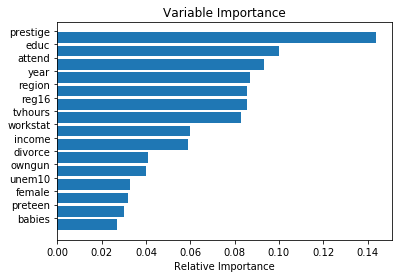

In [14]:
clf1 =  RandomForestClassifier(n_estimators=20)#随机森林模型调用
clf1.fit(x_train,y_train)#利用训练集训练模型
y_pred1 = clf1.predict(x_test)#模型预测

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

feature_importance = clf1.feature_importances_#特征重要程度
#feature_importance = 100.0*(feature_importance/feature_importance.max())

features_list = x_train.columns.values
sorted_idx = np.argsort(feature_importance)#返回的是数组值从小到大的索引值

pos = np.arange(sorted_idx.shape[0])+.5#设置间隔

plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center')

plt.yticks(pos,features_list[sorted_idx])

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### （2）卡方检验选择出的因变量

In [40]:
##  拆分数据集
from sklearn.model_selection import train_test_split    #调用sklearn包中的train_test_split()函数
x_train1,x_test1,y_train1,y_test1 = train_test_split(chi_X,Y,test_size = 0.3)    #拆分，30%为测试集

## 模型建立和评估

keys1 = []
scores1 = []
for k,v in models.items():#模型循环分别对数据集进行训练和预测
    mod = v
    mod.fit(x_train1, y_train1)#模型训练
    pred = mod.predict(x_test1)#模型预测
    print(str(k) + '建模效果：' + '\n')
    print(classification_report(y_test1, pred))#模型评估
    acc = accuracy_score(y_test1, pred)
    print('分类正确率：'+ str(acc))
    print(confusion_matrix(pred,y_test1))#混淆矩阵
    print('\n' + '\n')
    keys1.append(k)
    scores1.append(acc)
    table1 = pd.DataFrame({'model':keys1, 'accuracy score':scores1})

table1


K-近邻建模效果：

              precision    recall  f1-score   support

           1       0.16      0.10      0.12       650
           3       0.58      0.74      0.65      2893
           5       0.41      0.26      0.32      1599

    accuracy                           0.51      5142
   macro avg       0.38      0.37      0.36      5142
weighted avg       0.47      0.51      0.48      5142

分类正确率：0.5128354725787632
[[  63  225   94]
 [ 501 2154 1085]
 [  86  514  420]]



支持向量机建模效果：

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       650
           3       0.56      1.00      0.72      2893
           5       0.00      0.00      0.00      1599

    accuracy                           0.56      5142
   macro avg       0.19      0.33      0.24      5142
weighted avg       0.32      0.56      0.41      5142

分类正确率：0.5626215480357838
[[   0    0    0]
 [ 650 2893 1599]
 [   0    0    0]]



决策树建模效果：

              precision    recall  f1-s

D:\Users\xyf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


随机森林建模效果：

              precision    recall  f1-score   support

           1       0.33      0.05      0.09       650
           3       0.58      0.83      0.68      2893
           5       0.45      0.26      0.33      1599

    accuracy                           0.55      5142
   macro avg       0.45      0.38      0.37      5142
weighted avg       0.51      0.55      0.50      5142

分类正确率：0.5548424737456242
[[  34   46   24]
 [ 557 2398 1154]
 [  59  449  421]]





,model,accuracy score
0,K-近邻,0.512835
1,支持向量机,0.562622
2,决策树,0.460521
3,随机森林,0.554842


### （3）主成分分析（pca)选出的因变量

In [47]:
##  拆分数据集

from sklearn.model_selection import train_test_split     #调用sklearn包中的train_test_split()函数
x_train2,x_test2,y_train2,y_test2 = train_test_split(pca_X,Y,test_size = 0.3)    #拆分，30%为测试集

## 模型建立和评估

keys2 = []
scores2 = []
for k,v in models.items():#模型循环分别对数据集进行训练和预测
    mod = v
    mod.fit(x_train2, y_train2)#模型训练
    pred = mod.predict(x_test2)#模型预测
    print(str(k) + '建模效果：' + '\n')
    print(classification_report(y_test2, pred))#模型评估
    acc = accuracy_score(y_test2, pred)
    print('分类正确率：'+ str(acc))
    print(confusion_matrix(pred,y_test2))#混淆矩阵
    print('\n' + '\n')
    keys2.append(k)
    scores2.append(acc)
    table2 = pd.DataFrame({'model':keys2, 'accuracy score':scores2})

table2


K-近邻建模效果：

              precision    recall  f1-score   support

           1       0.19      0.13      0.15       621
           3       0.57      0.74      0.65      2921
           5       0.35      0.22      0.27      1600

    accuracy                           0.50      5142
   macro avg       0.37      0.36      0.36      5142
weighted avg       0.46      0.50      0.47      5142

分类正确率：0.500777907429016
[[  80  232  113]
 [ 450 2147 1139]
 [  91  542  348]]



支持向量机建模效果：

              precision    recall  f1-score   support

           1       0.15      0.01      0.01       621
           3       0.57      0.89      0.70      2921
           5       0.37      0.14      0.20      1600

    accuracy                           0.55      5142
   macro avg       0.36      0.34      0.30      5142
weighted avg       0.46      0.55      0.46      5142

分类正确率：0.5470633994554648
[[   4   18    4]
 [ 552 2590 1377]
 [  65  313  219]]



决策树建模效果：

              precision    recall  f1-sc

,model,accuracy score
0,K-近邻,0.500778
1,支持向量机,0.547063
2,决策树,0.446713
3,随机森林,0.536951


## 结论：选择RFE进行特征选择，利用随机森林模型进行评估预测